Quick look at the EEG data from Nautilisbrain and first tests with AutoReject

In [1]:
import os ### Package that will be useful for manipulating file paths and directories
import numpy as np ### We will use numpy for matrix manipulation

### The next command is not python, but is specific to jupyter. It enables the interactive plots. 

%matplotlib notebook

from mne.io import read_raw_edf # This is the function to open the raw data

import matplotlib.pyplot as plt # We also import the plotting functions from matplotlib

Extracting EDF parameters from /ancienhome/nfarrugi/Dropbox/NautilisBrain/christopherocher/eeg_a_trier/caroltrio_eeg_2019.03.15_11.02.00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<IPython.core.display.Javascript object>


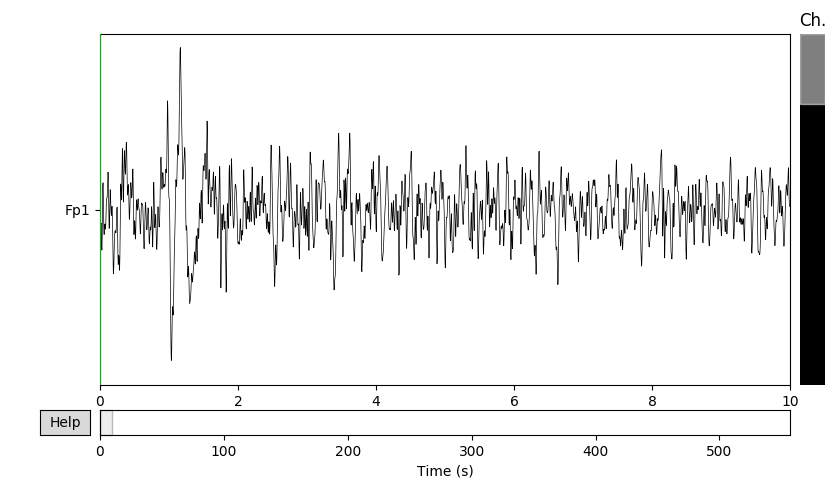

In [2]:
path_to_dropboxfolder = '/ancienhome/nfarrugi/Dropbox/'

filepath = os.path.join(path_to_dropboxfolder,'NautilisBrain/christopherocher/eeg_a_trier/caroltrio_eeg_2019.03.15_11.02.00.edf')

Raw = read_raw_edf(filepath,stim_channel=False) 
# The second argument is neeeded, otherwise the function assumes that the last channel 
# is a "stimulation" channel, but in our case we only have EEG channels


from mne.channels import rename_channels
#Changing the channel names because there is a mistake

#rename_channels(Raw.info,{'T7' : 'FT7','T8' : 'FC8'}) 



from mne.channels import read_montage
# We read the electrode position from the standard template positions
montage = read_montage(kind='standard_1020',ch_names=Raw.ch_names)

# and apply them to the data
Raw.set_montage(montage)

scales = dict(eeg='auto') ### This is necessary because the data acquired by openBCI 
# seems to have a very different scaling than the data acquired by standard EEG amplifiers


Raw.plot(n_channels=1,scalings=scales) ## This opens an interactive plot
plt.show() # this is needed otherwise the plot is opened twice 


First we need to epoch the data, which simply means cutting it into pieces. We will cut the data into contiguous segments

In [3]:
from mne import make_fixed_length_events, Epochs

# Build epochs as sliding windows over the continuous raw file
events = make_fixed_length_events(Raw, id=1, duration=2)

DataEpochs = Epochs(Raw, events, tmin=0., tmax=2, baseline=None,proj=False,detrend=None,preload=True)
DataEpochs.set_montage(montage=montage)

278 matching events found
No baseline correction applied
Not setting metadata
Loading data for 278 events and 501 original time points ...
0 bad epochs dropped


<Epochs  |   278 events (all good), 0 - 2 sec, baseline off, ~5.3 MB, data loaded,
 '1': 278>

<IPython.core.display.Javascript object>


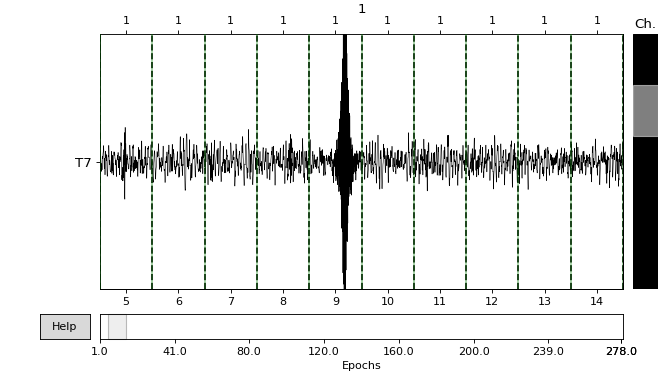

In [4]:
scales = dict(eeg=5)
DataEpochs.plot(scalings=scales,n_channels=1,n_epochs=10)
plt.show()

In [5]:
from autoreject import compute_thresholds,get_rejection_threshold

dict_rej = get_rejection_threshold(DataEpochs)

Estimating rejection dictionary for eeg


In [6]:
print(dict_rej)

{'eeg': 46.08224612802319}


In [10]:
DataEpochs_clean = Epochs(Raw, events, tmin=0., tmax=2, baseline=None,proj=False,detrend=None,preload=True,reject=dict_rej)

278 matching events found
No baseline correction applied
Not setting metadata
Loading data for 278 events and 501 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2', 'T8', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp

On peut retrouver facilement quels essais ont été rejetés : 

In [37]:
index_rejected = []
for i,curtrial in enumerate(DataEpochs_clean.drop_log):
    if len(curtrial) > 0:
        index_rejected.append(i)

Il s'agira ensuite de synchroniser les curseurs avec les données EEG 

<IPython.core.display.Javascript object>


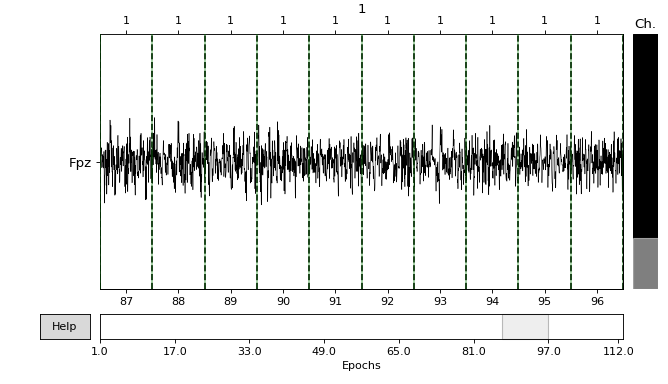

In [11]:
DataEpochs_clean.plot(scalings=scales,n_channels=1,n_epochs=10)
plt.show()

<IPython.core.display.Javascript object>


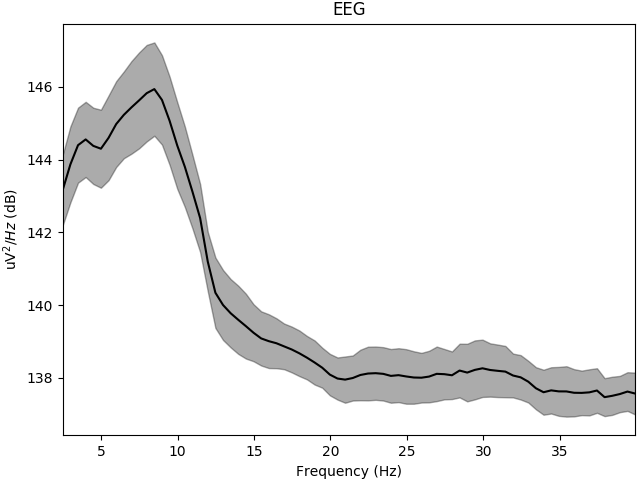

    Using multitaper spectrum estimation with 7 DPSS windows


In [18]:
DataEpochs_clean.plot_psd(fmax=40,fmin=2)
plt.show()

<IPython.core.display.Javascript object>


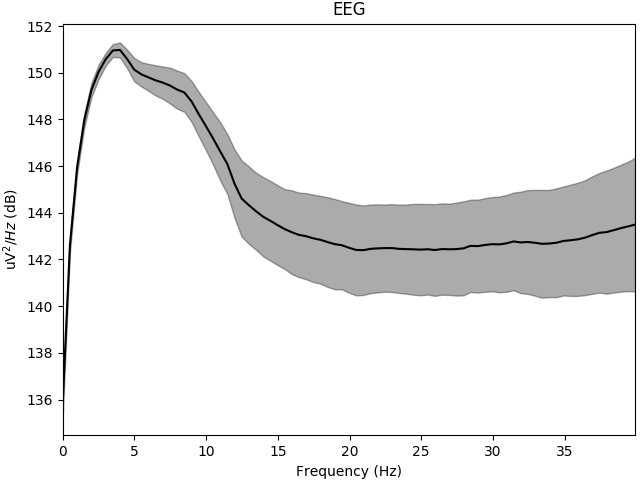

    Using multitaper spectrum estimation with 7 DPSS windows


In [13]:
DataEpochs.plot_psd(fmax=40)
plt.show()

Time frequency analysis

In [20]:
from mne.time_frequency import (tfr_morlet)

freqs = np.arange(5., 40., 2.)
all_n_cycles = [1, 3, freqs / 2.]
print(freqs)

power = tfr_morlet(DataEpochs_clean, freqs=freqs,n_cycles=all_n_cycles[2], return_itc=False,average=False)

[ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35. 37. 39.]


In [22]:
power.data.shape

(112, 5, 18, 501)

No baseline correction applied


<IPython.core.display.Javascript object>


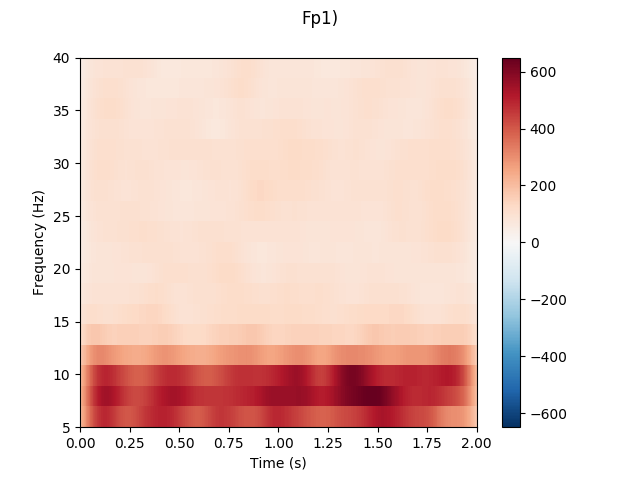

In [24]:
avgpower = power.average()
avgpower.plot()
plt.show()

In [25]:
powerdata = power.data
powerdata.shape

(112, 5, 18, 501)

In [26]:
alphapower = powerdata[:,:,2,:]
alphapower.shape

(112, 5, 501)

In [27]:
alphapower = alphapower.mean(axis=2)

<IPython.core.display.Javascript object>


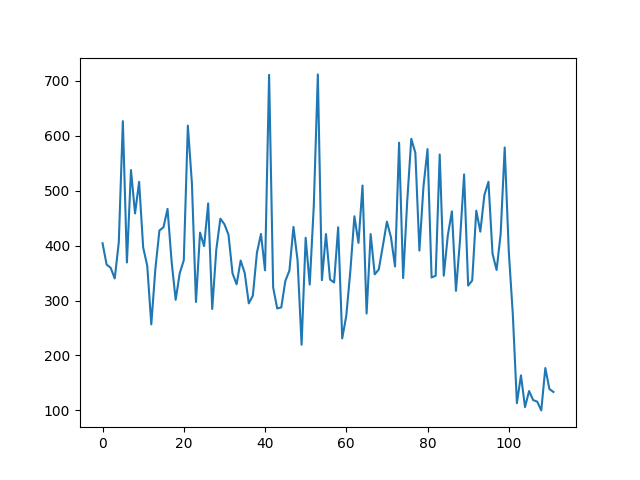

In [28]:
plt.plot(alphapower.mean(axis=1))


Tests with ICA 

In [ ]:
from mne.preprocessing import ICA

my_ica = ICA()
my_ica.fit(Raw)

In [ ]:
my_ica.plot_properties(Raw,psd_args={'fmax': 35.})

In [ ]:
my_ica.exclude=[0]

In [ ]:
my_ica.apply(Raw.load_data())

In [ ]:
Raw.plot(n_channels=1,scalings=scales) ## This opens an interactive plot
plt.show() # this is needed otherwise the plot is opened twice 
